In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA



In [2]:
data_dir = './GSE61260/'

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control


In [4]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

print(le.classes_)

X = df.drop(columns = ['Sample_ID', 'Disease'])



X.head()

['healthy obese' 'nafld' 'nash' 'normal control' 'pbc' 'psc']


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283740,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,0.324708,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,0.598294,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,0.647441,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,0.446519,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.820740,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(X_train.shape)
print(X_test.shape)

(106, 21661)
(27, 21661)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)}

# svm = SVC(random_state=1)

# svm_model = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)

# svm_model.fit(X_train_scaled, y_train)

# y_pred = svm_model.predict(X_test_scaled)

# accuracy = accuracy_score(y_test, y_pred)

# print(accuracy)

In [8]:
# print(classification_report(y_test, y_pred, target_names=le.classes_))

In [9]:
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:")
# sns.heatmap(conf_matrix)


In [10]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), # Corrected duplicate 'rbf'
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}


pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(random_state=1)

svm_model = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


# svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.7037037037037037



Confusion Matrix:


<Axes: >

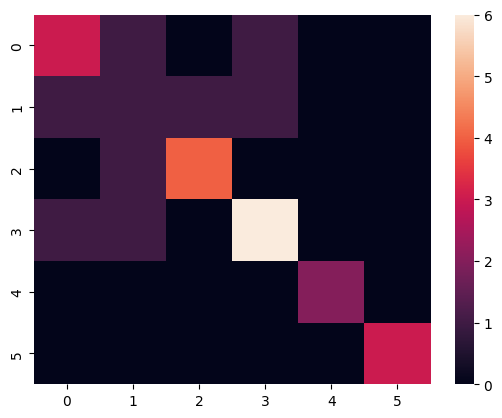

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)